In [92]:
#!pip install seaborn
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [93]:
data = "./data/Assignment_PA.csv"

In [94]:
df = pd.read_csv(data)

In [95]:
round(df.describe(), 2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
count,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,...,1941.00,1941.00,1941.00,1941.00,1941.0,1941.0,1941.00,1941.00,1941.00,1941.00
mean,571.14,617.96,1650684.87,1650738.71,1893.88,111.86,82.97,206312.15,84.55,130.19,...,0.08,-0.13,0.59,0.08,0.1,0.2,0.04,0.03,0.21,1.35
std,520.69,497.63,1774578.41,1774590.09,5168.46,301.21,426.48,512293.59,32.13,18.69,...,0.50,0.15,0.34,0.27,0.3,0.4,0.19,0.17,0.41,0.48
min,0.00,4.00,6712.00,6724.00,2.00,2.00,1.00,250.00,0.00,37.00,...,-0.99,-1.00,0.12,0.00,0.0,0.0,0.00,0.00,0.00,1.00
25%,51.00,192.00,471253.00,471281.00,84.00,15.00,13.00,9522.00,63.00,124.00,...,-0.33,-0.20,0.25,0.00,0.0,0.0,0.00,0.00,0.00,1.00
50%,435.00,467.00,1204128.00,1204136.00,174.00,26.00,25.00,19202.00,90.00,127.00,...,0.10,-0.13,0.51,0.00,0.0,0.0,0.00,0.00,0.00,1.00
75%,1053.00,1072.00,2183073.00,2183084.00,822.00,84.00,83.00,83011.00,106.00,140.00,...,0.51,-0.07,1.00,0.00,0.0,0.0,0.00,0.00,0.00,2.00
max,1705.00,1713.00,12987661.00,12987692.00,152655.00,10449.00,18152.00,11591414.00,203.00,253.00,...,0.99,0.64,1.00,1.00,1.0,1.0,1.00,1.00,1.00,2.00


In [96]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,2
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,2
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,2
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,2
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.2000,-0.1139,0.5296,0,0,0,0,0,0,2


In [97]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'Class'],
      dtype='object')

In [98]:
y = df.Class

In [99]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33']

In [100]:
X = df[features]

In [101]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
subset = df[features]

In [109]:
pearson = subset.corr(method='pearson')
pearson

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
V1,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.326851,0.178585,-0.031578,-0.355251,0.134956,-0.228960,-0.419264,0.073740,0.103924,0.221296
V2,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.265990,0.115019,-0.038996,-0.286736,0.119814,-0.258178,-0.336084,0.061471,0.096523,0.201704
V3,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,-0.008442,-0.086497,-0.090654,0.025257,0.036488,-0.063327,-0.000420,-0.066601,0.064262,0.126121
V4,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,-0.008382,-0.086480,-0.090666,0.025284,0.036488,-0.063329,-0.000397,-0.066606,0.064262,0.126110
V5,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.578342,-0.137604,-0.043449,0.422947,-0.076752,-0.088440,0.556846,-0.071182,-0.050578,-0.163739
V6,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.523472,-0.101731,-0.032617,0.380605,-0.075418,-0.060582,0.455003,-0.067547,-0.037820,-0.140197
V7,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.344378,0.031381,-0.047778,0.191772,-0.017616,-0.025721,0.203063,-0.035743,-0.010058,-0.070989
V8,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.618795,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831
V9,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.588208,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690
V10,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,-0.069522,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549


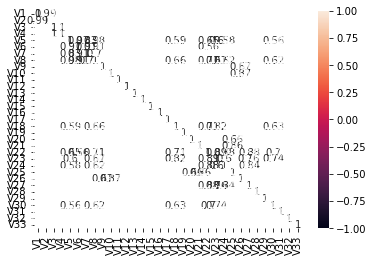

In [110]:

data = sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            annot=True,
            
            linewidth=0.5)

In [91]:
print(data)

AxesSubplot(0.125,0.125;0.62x0.755)


In [11]:
assignment_model = DecisionTreeRegressor(random_state=1)

In [12]:
assignment_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [13]:
print(X.head())

     V1    V2       V3       V4    V5  V6   V7      V8  V9  V10  ...     V24  \
0    42    50   270900   270944   267  17   44   24220  76  108  ...  1.6435   
1   645   651  2538079  2538108   108  10   30   11397  84  123  ...  1.4624   
2   829   835  1553913  1553931    71   8   19    7972  99  125  ...  1.2553   
3   853   860   369370   369415   176  13   45   18996  99  126  ...  1.6532   
4  1289  1306   498078   498335  2409  60  260  246930  37  126  ...  2.4099   

      V25     V26     V27  V28  V29  V30  V31  V32  V33  
0  0.8182 -0.2913  0.5822    1    0    0    0    0    0  
1  0.7931 -0.1756  0.2984    1    0    0    0    0    0  
2  0.6667 -0.1228  0.2150    1    0    0    0    0    0  
3  0.8444 -0.1568  0.5212    1    0    0    0    0    0  
4  0.9338 -0.1992  1.0000    1    0    0    0    0    0  

[5 rows x 33 columns]


In [14]:
print(y.tail())

1936    2
1937    2
1938    2
1939    2
1940    2
Name: Class, dtype: int64


In [15]:
assignment_model.predict(X.head())

array([1., 1., 1., 1., 1.])

In [16]:
# Split data into training set and testing set
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [17]:
val_y.tail()

1638    2
667     1
981     1
1038    1
452     1
Name: Class, dtype: int64

In [18]:
train_y.tail(10)

1747    2
1033    1
1383    2
1731    2
763     1
835     1
1216    1
1653    2
559     1
684     1
Name: Class, dtype: int64

In [19]:
# Fit the data
assignment_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [20]:
val_predictions = assignment_model.predict(val_X)

In [21]:
val_X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33'],
      dtype='object')

In [22]:
print(val_predictions)

[1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2. 1. 2.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2.
 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1.
 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2.
 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1.
 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2.
 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2.
 2. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1.

In [23]:
print(val_y.head())

768     1
704     1
726     1
215     1
1158    1
Name: Class, dtype: int64


In [24]:
mean_absolute_error(val_y, val_predictions)

0.0

In [25]:
print(val_y)

768     1
704     1
726     1
215     1
1158    1
       ..
1638    2
667     1
981     1
1038    1
452     1
Name: Class, Length: 486, dtype: int64


In [26]:
val_X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
768,805,813,273908,273912,16,8,4,2121,114,148,...,0.6021,-0.5000,0.0356,0.1417,0,0,0,1,0,0
704,41,209,4401486,4401544,5533,288,155,584291,43,126,...,1.7634,-0.6548,-0.1750,1.0000,0,0,1,0,0,0
726,1,250,115072,115195,15650,943,539,1732196,23,140,...,2.0899,-0.5060,-0.1353,1.0000,0,0,1,0,0,0
215,244,275,923170,923211,709,84,55,83627,105,132,...,1.6128,0.2439,-0.0785,0.9984,0,1,0,0,0,0
1158,95,127,961065,961092,551,44,27,53142,56,128,...,1.4314,-0.1563,-0.2465,0.9769,0,0,0,0,0,1


In [27]:
# Less number of features
features = ['V1', 'V2', 'V3', 'V4']

In [28]:
X = df[features]

In [29]:
X.head()

,V1,V2,V3,V4
0,42,50,270900,270944
1,645,651,2538079,2538108
2,829,835,1553913,1553931
3,853,860,369370,369415
4,1289,1306,498078,498335


In [30]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [31]:
assignment_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [32]:
val_predictions = assignment_model.predict(val_X)

In [33]:
dat = [1343,1352,106512,106519,52,9,7,5049,87,109,1366,0,1,100,0.0205,0.1746,0.7778,0.0066,1,1,0,1.716,0.9542,0.8451,-0.2222,-0.2414,0.1687,1,0,0,0,0,0]

In [34]:
val_X

,V1,V2,V3,V4
768,805,813,273908,273912
704,41,209,4401486,4401544
726,1,250,115072,115195
215,244,275,923170,923211
1158,95,127,961065,961092
...,...,...,...,...
1638,1163,1171,2016193,2016200
667,41,207,2336275,2336344
981,1049,1058,3577116,3577127
1038,1474,1489,1248833,1248844


In [35]:
mean_absolute_error(val_y, val_predictions)

0.31893004115226337

In [36]:
def area(l, b):
    return l * b

rect_area = area(2, 3)

In [37]:
print(rect_area)

6


In [38]:
array = [1, 2, 3, 4, 5]

total = 0

print("total ", total)

for val in array:
    total = total + val
    # print("val ", val, " total ", total )

print(total)

total  0
15


In [39]:
def total_of_array(ary):
    total = 0
    for val in ary:
        total = total + val
    return total

print(total_of_array([1, 3, 5]))
print(total_of_array([1, 1, 1]))

9
3


In [40]:
print(total_of_array([2, 2, 2]))

6
